In [1]:
import numpy as np
import math
import sympy
import timeit
import matplotlib.pyplot as plt

### Helper Functions

First we'll define a series of helper functions to our main factorization function. 

Each one will be as self contained as possible.

Implementation of this method: https://kaustubhrakhade.medium.com/shors-factoring-algorithm-94a0796a13b1

In [2]:
def check_N_conditions(N):
    # make sure not even
    if N % 2 == 0:
        # print(N, "is even, faield test 1")
        return False
    
    if sympy.isprime(N):
        # print(N, "is prime, failed test 2")
        return False
    
    # O(sqrt(n)) loop to check every number to N
    for i in range(2, int(math.sqrt(N))+1):
        
        # make sure not of form n**x
        x = 2
        while i**x <= N: 
            if i**x == N:
                # print(N, " is of form N**x, faield test 3")
                return False
            x += 1

    return True

"""
# Test cases with expected results
test_cases = [9, 27, 15, 20, 37, 64, 81, 121, 7, 49, 16, 18, 23, 25, 11]
expected_results = [False, False, True, False, True, False, False, False, True, False, False, False, True, False, True]

# Running the test cases
for i, test in enumerate(test_cases):
    result = check_N_conditions(test)
    print(f"Test case {i+1}: N={test}, Expected={expected_results[i]}, Result={result}, {'Passed' if result == expected_results[i] else 'Failed'}")
"""

'\n# Test cases with expected results\ntest_cases = [9, 27, 15, 20, 37, 64, 81, 121, 7, 49, 16, 18, 23, 25, 11]\nexpected_results = [False, False, True, False, True, False, False, False, True, False, False, False, True, False, True]\n\n# Running the test cases\nfor i, test in enumerate(test_cases):\n    result = check_N_conditions(test)\n    print(f"Test case {i+1}: N={test}, Expected={expected_results[i]}, Result={result}, {\'Passed\' if result == expected_results[i] else \'Failed\'}")\n'

In [3]:
def choose_k(N, tried_k=[]):
    possible_k = np.arange(1, N)
    for k in tried_k:
        possible_k = possible_k[possible_k != k]
    
    return np.random.choice(possible_k)

In [4]:
def check_gcd(N, k):
    return np.gcd(N, k) == 1

This next function is the classical implementation of what could be a quantum implementation. Without the quantum implementation, Shor's method is slower than alternative factoring algorithms in the classical paradigm.

In [5]:
# main step 4 that should become quantized....
def get_order_and_transformation(N, k):
    q = 1
    remainders = []

    while (q*k) % N != 1:
        q = (q*k) % N
        remainders.append(q)

    q = (q*k) % N
    remainders.append(q)
    
    return len(remainders), remainders

In [6]:
def get_p(r, tranformation_remainders):
    return tranformation_remainders[int(r/2 - 1)]

This is for later, but will help us generate random numbers that we might want to factorize.

In [7]:
def generate_random_non_prime_odd(magnitude):
    lower = 10 ** magnitude
    upper = (10 ** (magnitude + 1)) - 1
    while True:
        num = np.random.randint(lower, upper)
        # Ensure the number is odd
        if num % 2 == 0:
            num += 1
        if not sympy.isprime(num):
            return num

### Factorization!
Here we put all helper functions together into one main function that returns two factors of the given number. 

In [8]:
def factorize(N=781):

    # Step 1: define N that satisfies conditions
    not_done = True

    if not check_N_conditions(N):
        print("N does not satisfy conditions")
        exit()

    while not_done:
        r = 1

        # Step 2: Choose a random k
        k = choose_k(N)

        # Step 3: Check if gcd(N, k) = 1
        if check_gcd(N, k):
            pass
        else: 
            # print("factors of ", N, "are", np.gcd(k, N), "and", int(N/np.gcd(k, N)), "\n")
            # print("random value k = ", k, ", order r = ", 0, ", middle remainder p = n/a")
            return np.gcd(k, N), int(N/np.gcd(k, N))

        # Step 4: Find the order of k mod N
        r, tranformation_remainders = get_order_and_transformation(N, k)

        # Step 5: If the order is odd, go back to step 2
        if r % 2 != 0:
            not_done = True
            continue

        # Step 6: Define p
        p = get_p(r, tranformation_remainders)
        if p + 1 == N: 
            not_done = True
            continue

        not_done = False

    # Step 7: find and print factors
    # print("factors of ", N, "are", np.gcd(p+1, N), "and", np.gcd(p-1, N), "\n")
    # print("random value k = ", k, ", order r = ", r, ", middle remainder p = ", p)

    return np.gcd(p+1, N), np.gcd(p-1, N)

In [9]:
def shor_classical_factorization(n):
    def recursive_factorize(n, factors):
        if n == 1:
            return factors
        if sympy.isprime(n):
            factors[n] = factors.get(n, 0) + 1
            return factors
        factor1, factor2 = factorize(n)
        if sympy.isprime(factor1):
            factors[factor1] = factors.get(factor1, 0) + 1
        else:
            recursive_factorize(factor1, factors)
        if sympy.isprime(factor2):
            factors[factor2] = factors.get(factor2, 0) + 1
        else:
            recursive_factorize(factor2, factors)
        return factors

    factors = {}
    return recursive_factorize(n, factors)

### Classical Optimized Version

We'll use sympy's library for a strong example of fully optimized classical factorization techniques. 

In [10]:
def classical_factorization(n):
    return sympy.factorint(n)

### Testing and Plotting

Great! Now we're ready to analyze our results. Here we plot input size against time our algorithms took to understand the scaling of each algorithm. 

In [23]:
nums_to_factor, shor_times, classical_times = [], [], []

for num in [51, 329, 1037, 23083, 492371, 2323781, 97451835, 391739481]:
    nums_to_factor.append(num)
    shor_time = timeit.timeit(f"factorize({num})", globals=globals(), number=1)
    shor_times.append(shor_time)
    classical_time = timeit.timeit(f"shor_classical_factorization({num})", globals=globals(), number=1)
    classical_times.append(classical_time)

In [22]:
sympy.isprime(391739481)

False

In [12]:
"""max_magnitude = 4
samples = 10

shor_times, classical_times = np.zeros((max_magnitude - 1, samples)), np.zeros((max_magnitude - 1, samples))
nums_to_factor = np.zeros((max_magnitude - 1, samples))

for mag in range(1, max_magnitude):
    for i in range(samples):
        num = generate_random_non_prime_odd(mag)
        while not check_N_conditions(num):
            num = generate_random_non_prime_odd(mag)

        nums_to_factor[mag-1, i] = num

        shor_times[mag-1, i] = timeit.timeit(f"shor_classical_factorization({num})", globals=globals(), number=1)
        classical_times[mag-1, i] = timeit.timeit(f"classical_factorization({num})", globals=globals(), number=1)"""

'max_magnitude = 4\nsamples = 10\n\nshor_times, classical_times = np.zeros((max_magnitude - 1, samples)), np.zeros((max_magnitude - 1, samples))\nnums_to_factor = np.zeros((max_magnitude - 1, samples))\n\nfor mag in range(1, max_magnitude):\n    for i in range(samples):\n        num = generate_random_non_prime_odd(mag)\n        while not check_N_conditions(num):\n            num = generate_random_non_prime_odd(mag)\n\n        nums_to_factor[mag-1, i] = num\n\n        shor_times[mag-1, i] = timeit.timeit(f"shor_classical_factorization({num})", globals=globals(), number=1)\n        classical_times[mag-1, i] = timeit.timeit(f"classical_factorization({num})", globals=globals(), number=1)'

In [13]:
"""nums_to_factor = np.array([[27, 45, 15, 95, 63, 75, 85, 33, 95, 75],
                  [949, 657, 543, 539, 155, 651, 511, 669, 417, 869],
                  [5559, 7569, 4371, 9229, 3639, 1899, 7405, 9625, 8809, 7553],
                  [85267, 47285, 53067, 93681, 66971, 67517, 11891, 26413, 92975, 33145]])

shor_times = np.vectorize(shor_classical_factorization)(nums_to_factor)
"""

'nums_to_factor = np.array([[27, 45, 15, 95, 63, 75, 85, 33, 95, 75],\n                  [949, 657, 543, 539, 155, 651, 511, 669, 417, 869],\n                  [5559, 7569, 4371, 9229, 3639, 1899, 7405, 9625, 8809, 7553],\n                  [85267, 47285, 53067, 93681, 66971, 67517, 11891, 26413, 92975, 33145]])\n\nshor_times = np.vectorize(shor_classical_factorization)(nums_to_factor)\n'

In [14]:
"""# plot the times versus input size for both algorithms
plt.loglog(
    np.mean(nums_to_factor, axis=1), 
    np.mean(shor_times, axis=1),
    label="Shor's Algorithm")
plt.loglog(
    np.mean(nums_to_factor, axis=1), 
    np.mean(classical_times, axis=1),
    label="Classical Algorithm")
plt.xlabel("Input Size")
plt.ylabel("Time")
plt.title("Shor's Algorithm vs Classical Factorization")
plt.legend()
plt.show()"""

'# plot the times versus input size for both algorithms\nplt.loglog(\n    np.mean(nums_to_factor, axis=1), \n    np.mean(shor_times, axis=1),\n    label="Shor\'s Algorithm")\nplt.loglog(\n    np.mean(nums_to_factor, axis=1), \n    np.mean(classical_times, axis=1),\n    label="Classical Algorithm")\nplt.xlabel("Input Size")\nplt.ylabel("Time")\nplt.title("Shor\'s Algorithm vs Classical Factorization")\nplt.legend()\nplt.show()'

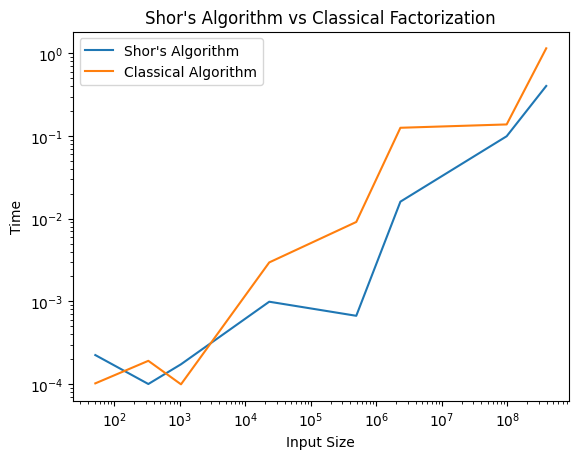

In [24]:
# plot the times versus input size for both algorithms
plt.loglog(nums_to_factor, shor_times,
    label="Shor's Algorithm")
plt.loglog(nums_to_factor, classical_times, 
    label="Classical Algorithm")
plt.xlabel("Input Size")
plt.ylabel("Time")
plt.title("Shor's Algorithm vs Classical Factorization")
plt.legend()
plt.show()